<a href="https://colab.research.google.com/github/Dhaliyanoushad/Dhaliyanoushad/blob/main/Weather_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
data = pd.read_csv("daily_min_temperature.csv")

print(data.head())
print(data.info())


         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB
None


In [3]:
temperature = data[['Temp']].values


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature)



In [5]:
def create_sequences(data, time_steps=7):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(temperature_scaled, time_steps=7)

print(X.shape)
print(y.shape)


(3643, 7, 1)
(3643, 1)


In [6]:
split = int(0.8 * len(X))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]


In [7]:
model = Sequential()

model.add(
    LSTM(
        units=50,
        activation='relu',
        input_shape=(7, 1)
    )
)

model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test)
)


Epoch 1/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0658 - val_loss: 0.0095
Epoch 2/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0113 - val_loss: 0.0091
Epoch 3/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - val_loss: 0.0091
Epoch 4/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107 - val_loss: 0.0090
Epoch 5/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0105 - val_loss: 0.0085
Epoch 6/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - val_loss: 0.0085
Epoch 7/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 8/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - val_loss: 0.0076
Epoch 9/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - val_loss: 0.0074
Epoch 10/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0089 - val_loss: 0.0075
Epoch 11/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - val_loss: 0.0074
Epoch 12/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [9]:
predictions = model.predict(X_test)

# Convert back to real temperature
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)



23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


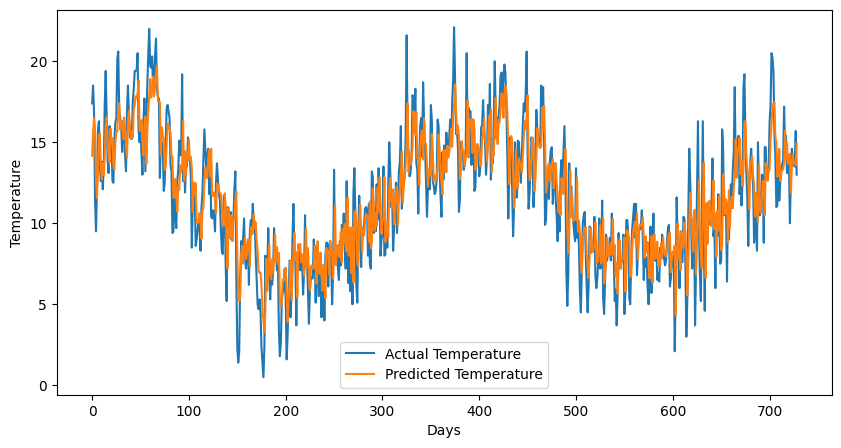

In [10]:
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual Temperature")
plt.plot(predictions, label="Predicted Temperature")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()
plt.show()


In [11]:
last_7_days = temperature_scaled[-7:]
last_7_days = last_7_days.reshape(1, 7, 1)

future_temp = model.predict(last_7_days)
future_temp = scaler.inverse_transform(future_temp)

print("Predicted next day temperature:", future_temp[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted next day temperature: 13.4225025
